
## Machine Learning for Biomedical Applications (level 6)


<img src="images/FetalBody.png" width = "350" style="float: right;"> 

### My Own Ridge Regression

Assessment of fetal organs is important for diagnosis of congenital abnormalities, fetal infection and prediction of postnatal outcome. This study assesses relationship between fetal organ growth and maturation and gestational age (GA).

The dataset is stored in the file _"fetal_lungs_thymus_growth.csv"_ and contains GA in the first column, followed by volumes of fetal whole body, lungs, thymus and their ratios. Finally, the maturation of the lungs is measured by lung-to-liver intensity ratio.
<img src="images/FetalBodyOrgans.png" width = "250" style="float: right;"> 

Your task is to perdict GA of the fetus from these measurements. To do that you will implement your own Ridge regression in Numpy. Do not use scikit-learn when solving this question.

The code below loads the file and creates target vector `y` and feature matrix `X`. Run the code.

In [11]:
import pandas as pd

# Read the data
df = pd.read_csv("datasets/fetal_lungs_thymus_growth.csv")
df

,GA,Fetal volume [mm^3],Lung volume [mm^3],Lung volume / Fetal volume,Thymus volume [mm^3],Thymus volume / Fetal volume,Thymus volume / Lung Volume,Lung-to-liver intensity ratio
0,22.714286,478775,18805.6,0.039279,947.495,0.001979,0.050384,0.501978
1,24.000000,560772,17325.8,0.030896,1532.950,0.002734,0.088478,0.501213
2,22.571429,565312,21976.9,0.038876,981.317,0.001736,0.044652,0.462235
3,23.857143,601383,20671.4,0.034373,1446.720,0.002406,0.069987,0.529995
4,24.142857,617657,21527.5,0.034853,1645.900,0.002665,0.076456,0.595154
...,...,...,...,...,...,...,...,...
96,25.000000,690496,24338.8,0.035248,2111.370,0.003058,0.086749,0.479418
97,28.285714,1361200,59149.8,0.043454,6601.880,0.004850,0.111613,0.351258
98,22.714286,465647,19177.7,0.041185,835.049,0.001793,0.043543,0.624941
99,25.714286,793882,29573.4,0.037252,2967.970,0.003739,0.100359,0.533237


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# convert to numpy
data = df.to_numpy()

# Create label/target vector
y = data[:,0] 

# Extract and scale features
features = StandardScaler().fit_transform(data[:,1:])

# Create feature matrix with extra column of ones
X = np.ones(data.shape);
X[:,1:]=features

# Print the first few lines of the feature matrix
print(np.around(X[:4,:],1))

[[ 1.  -1.3 -1.1  0.2 -1.3 -1.7 -1.5  0.8]
 [ 1.  -1.1 -1.2 -0.8 -1.1 -0.9 -0.4  0.8]
 [ 1.  -1.1 -0.9  0.2 -1.3 -2.  -1.7  0.4]
 [ 1.  -1.  -1.  -0.3 -1.1 -1.3 -0.9  1.1]]


__Task 1.1__ 

Print the dimensions of the feature matrix `X` and target vector `y`. Explain the meaning of each dimension

In [13]:
# Print dimensions X
print('Dimensions X: ', X.shape)
# Print dimensions y
print('Dimensions y: ', y.shape) 

Dimensions X:  (101, 8)
Dimensions y:  (101,)


Your answer:
X represents the independent variables of the dataset where the dimensions 101 is the number of data points and 8 is the number of features.
y(our target vector) represents the dependent variable we are trying to predict the dimensions correspond to the number of data points we have.

__Task 1.2__ 

Split the data into training set `X_train`, `y_train` and test set `X_test`, `y_test`. Use the first 80 samples as the training data and the remaining samples as test data. 

In [14]:
# training set, the first 80 samples
X_train=X[:80]
y_train=y[:80]

# test set, the remaining samples
X_test=X[80:]
y_test=y[80:]

# print dimensions
print('Number of samples in training set: feature matrix {}, target vector {}.'.format(X_train.shape[0],y_train.shape[0]))
print('Number of samples in test set: feature matrix {}, target vector {}.'.format(X_test.shape[0],y_test.shape[0]))

Number of samples in training set: feature matrix 80, target vector 80.
Number of samples in test set: feature matrix 21, target vector 21.


__Task 1.3_ 

Implement your own Ridge regression using functions available in `numpy` package. Do not use `sklearn`. Follow the ridge penalty implementation that is adopted in scikit-lean, where the penalty weight $\lambda$ is applied only for the weights $(\mathbf{w}_1,...,\mathbf{w}_D)$ and for $\mathbf{w}_0$ we have a penalty weight zero. To do that, you need to calculate the weight vector $w$ using the the following equation:

$$w=(X^TX+\Lambda)^{-1}X^Ty$$

$$\Lambda = \begin{pmatrix} 
0 & 0 & \cdots & 0 \\ 
0 & \lambda & \cdots & 0 \\
\vdots & \vdots & \cdots & \vdots \\
0 & 0 & \cdots & \lambda
\end{pmatrix}$$

Follow these steps:
* Create matrix $\Lambda$ and print it. Use $\lambda = 0.1$
* Calculate the weight vector $w$ and print its dimension, intercept and slopes
* Evaluate the prediction using the feature vector of the first subject (Subject 0) in the training set and print the result. Check that it is similar to the true GA.

In [15]:
# Create matrix Lambda
Lambda = np.eye(8) * 0.1
Lambda[0,0] = 0

print(Lambda)

[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1]]


In [16]:
# Implement equation
# w = np.linalg.inv(np.matmul(X_train.T, X_train) + Lambda).matmul(np.matmul(X_train.T, y_train))
w = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + Lambda), np.matmul(X_train.T, y_train))


# Print dimension of w 
print('Dimension of w is', w.shape) 

# print intercept 
intercept = w[0]
print('Intercept: ', np.round(intercept,1)) 

# print slopes
slopes = w[1:]
print('Slopes: ', np.round(slopes,1)) 

Dimension of w is (8,)
Intercept:  27.2
Slopes:  [ 2.8  0.3  0.2 -0.9  0.4  0.5 -0.1]


In [17]:
# Evaluate GA on the first subject in training set and print the result
print('Predicted GA of subject 0: ', round(np.matmul(X_train[0],w)))

# Print true age 
print('True GA of subject 0: ', round(y_train[0]))


Predicted GA of subject 0:  23
True GA of subject 0:  23


**Task 1.4**

Write a function `RMSE(y,y_pred)` that calculates and prints the root mean squared error between predicted and true target values. Predict the target values for training set and test set and calculculate RMSE for each set using the function you have written.

In [18]:
# Implement function RMSE

def RMSE(y,y_pred):
    #error = (y-y_pred)**2
    rmse = np.sqrt(np.mean((y-y_pred)**2))
    print('RMSE: ', round(rmse,2)) 

# predict on training set
y_train_pred = np.matmul(X_train,w)

# calculate error on training set
print('Training error:')
RMSE(y_train, y_train_pred)


# predict on test set
y_test_pred = np.matmul(X_test,w)

# calculate error on test set
print('Test error:')
RMSE(y_test, y_test_pred)

Training error:
RMSE:  0.56
Test error:
RMSE:  0.78


**Task 1.5 **

Check the fit by plotting the original target values vs predicted target values for the test set.
Plot also $y=\hat{y}$ line to see whether the plotted samples follow this line. Annotate the plot.

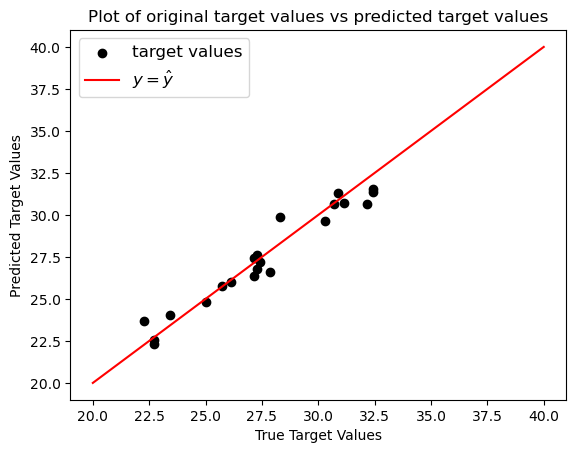

In [19]:
from matplotlib import pyplot as plt

# plot predicted against expected target values
plt.scatter(y_test, y_test_pred, color = 'black', label = "target values")

# Plot the line 𝑦=𝑦̂
plt.plot([20,40],[20,40],color = 'red', label = '$y=\hat{y}$')

# annotation 
plt.xlabel("True Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Plot of original target values vs predicted target values")
_=plt.legend(fontsize = 12)



**Task 1.6 **
Compare your result to the `Ridge` regression in `sklearn`. To do that
* create matrices `X1_train` and `X1_test` that do not have the column of ones, as sklearn does not require it.
* select `Ridge` regression model with correct paramaters
* fit the model to the training set
* calculate RMSE (using `sklearn` functions) on both training set and test set

Did you get the same result?

In [20]:
# create training and test feature matrices
X1_train = X_train[:,1:]
X1_test = X_test[:,1:]

# print the first few lines of the train matrix
print('Train:')
print(np.around(X1_train[:3,:],1))

# print the first few lines of the test matrix
print('\nTest:')
print(np.around(X1_test[:3,:],1))

Train:
[[-1.3 -1.1  0.2 -1.3 -1.7 -1.5  0.8]
 [-1.1 -1.2 -0.8 -1.1 -0.9 -0.4  0.8]
 [-1.1 -0.9  0.2 -1.3 -2.  -1.7  0.4]]

Test:
[[-0.1 -0.1 -0.   0.   0.5  0.2 -0.1]
 [-1.3 -1.3 -0.4 -1.1 -0.6 -0.3 -0.7]
 [-1.3 -0.6  2.1 -1.  -0.2 -1.2 -1.3]]


In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# select model 
model = Ridge(alpha = 0.1) # alpha = 0.1 in the paranthesis
#print("alpha = ", model.alpha)

# fit to the training set 
model.fit(X1_train, y_train)


# calculate RMSE on training set 
y_train_pred = model.predict(X1_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Training RMSE: ',round(rmse_train,2))

# calculate RMSE on test set - 2 marks (0 marks if not on test set)
y_test_pred = model.predict(X1_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Test RMSE: ',round(rmse_test,2))

Training RMSE:  0.56
Test RMSE:  0.78




### Multi-class classification
<img src="images/HeartSegmentation.gif" width = "200" style="float: right;"> 

The goal of this question is to develop a machine learning algorithm to diagnose severity of heart-failure, by distinguishing between
* healthy patients (Label 0)
* patient with mild heart failure (Label 1) 
* patients with severe heart failure (Label 2)

Your task is to develop and evaluate non-linear multi-label classifier to predict the HF diagnosis from **EF** and **QRS** indices. 

The code below 
* loads and prints the data
* creates the feature matrix `X` and label vector `y`
* normalises the features using `StandardScaler`
* plots the normalised data

Run the code.

In [26]:
import pandas as pd

# Load csv file
df = pd.read_csv("datasets/heart_failure_data_complete.csv")  
data = df.to_numpy()

# Print number of samples
print('Number of samples: ',data.shape[0])

# print
df 

Number of samples:  120


,HF,EF,GLS,QRS
0,0,50.922280,-19.57,88
1,0,54.601227,-19.00,86
2,0,50.000000,-21.00,99
3,0,50.819672,-18.74,85
4,0,53.191489,-19.78,86
...,...,...,...,...
115,2,17.941176,-18.14,160
116,2,19.363395,-14.29,118
117,2,22.916667,-19.73,130
118,2,28.301887,-19.39,180


Features dims: (120, 2)  Labels dims: (120,)


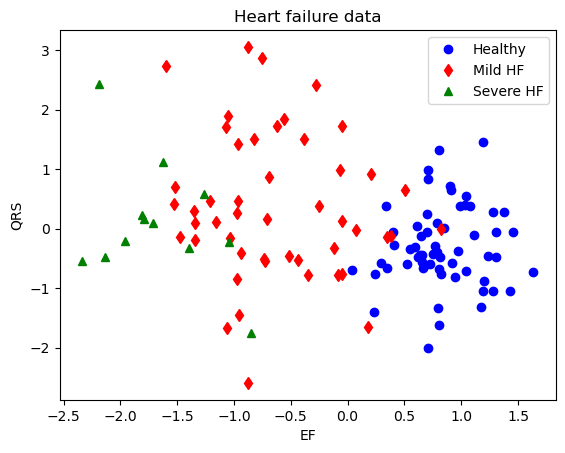

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create and standardise the feature matrix, create label vector
X = StandardScaler().fit_transform(data[:,[1,2]])
y = data[:,0]
print('Features dims: {}  Labels dims: {}'.format(X.shape, y.shape))

# Plot the data
def plotData(X,y):
    plt.plot(X[y==0,0],X[y==0,1],'bo', label = 'Healthy')
    plt.plot(X[y==1,0],X[y==1,1],'rd', label = 'Mild HF')
    plt.plot(X[y==2,0],X[y==2,1],'g^', label = 'Severe HF')
    plt.legend()
    plt.title('Heart failure data')
    plt.xlabel('EF')
    plt.ylabel('QRS')
    
plotData(X,y)

__Task 2.1 

To evaluate performance of a trained classifier, we need to split the data into training set and test set. Perform the following tasks:
* Use 25% of the data to create a test set. Stratify this test set by the labels.
* Plot training set and test set in the same figure. Annotate the plot.

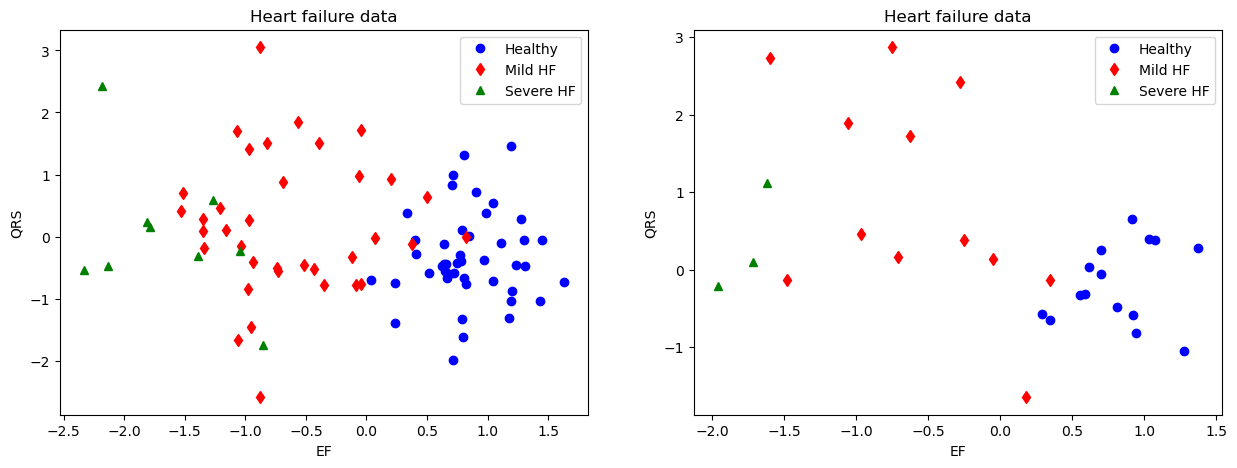

In [28]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify = y)

# plot 
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plotData(X_train, y_train)

plt.subplot(1,2,2)
plotData(X_test, y_test)

__Task 2.2 

Train a **support vector classifier with polynomial kernel** to predict HF class. Tune the appropriate parameters using `gridSearch` on the grid of values $[10^{-3}, 10^{-2},...,10^3]$ or $[1,..,10]$ as appropriate. Display the following results:
* Print cross-validated accuracy for the best model
* Print the best tuned parameters of the classifier
* Plot the decision boundary and the training data using the function `plotDecisionBoundary`

In [31]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create model
model = SVC(kernel = 'poly')

# Define parameter grid
param_grid = {"degree": range(1, 11), 
              "C": np.logspace(-3, 3, 7)}
#param = {'C':[10**i for i in range(-3,4)]}

# Perform grid search
grid_search = GridSearchCV(model, cv=5, param_grid=param_grid) 
_=grid_search.fit(X_train,y_train) 
print('Best cross-validated accuracy:', round(grid_search.best_score_,2))

#grid_search = GridSearchCV(model, param, cv = 5)
#grid_search.fit(X_train, y_train)

#find cross validated accuracy and print 
#score_poly = cross_val_score(model, X_train, y_train)

#print('Best cross-validated accuracy:', round(score_poly.mean(),2))

Best cross-validated accuracy: 0.89


In [32]:
# print hyperparameters
print('Selected parameter regularisation:', grid_search.best_estimator_.C)
#best_model.C) 
print('Selected parameter kernel:', grid_search.best_estimator_.degree)
#best_model.degree) 

Selected parameter regularisation: 1.0
Selected parameter kernel: 1


NameError: name 'best_model' is not defined

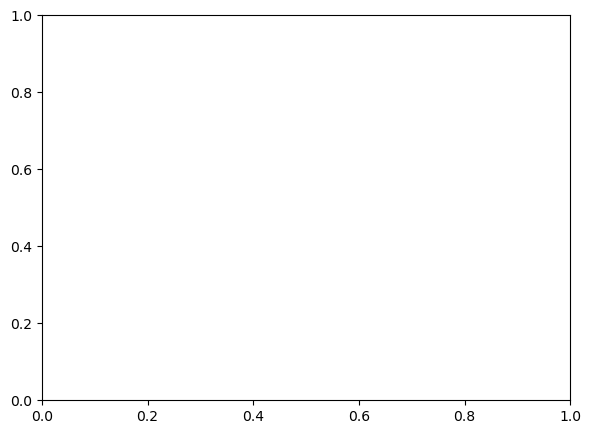

In [33]:
def plotDecisionBoundary(model,X,y):
    # Create an array that represents the sampled feature space
    xx = np.linspace(-3, 3, 500) 
    yy = np.linspace(-3, 3.5, 500).T 
    xx, yy = np.meshgrid(xx, yy) 
    Feature_space = np.c_[xx.ravel(), yy.ravel()] 

    # predict labels
    y_pred = model.predict(Feature_space).reshape(xx.shape)

    # plot predictions
    plt.contourf(xx,yy,y_pred, cmap = 'summer')
    plotData(X,y)

# plot the fitted model
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plotDecisionBoundary(best_model, X_train, y_train)
plt.title('Decision Boundary for the training data')

plt.subplot(1,2,2)
plotDecisionBoundary(best_model, X_test, y_test)
plt.title('Decision Boundary for the test data')


**Task 2.3: Evaluate your trained classifier:
* Calculate and print cross-validated recalls for each class, and also average recall over all classes.
* Calculate and plot the confusion matrix
* Interpret the results. Is there a problem with the classifier? Write your answer in the cell below.

In [657]:
# Calculate recalls for each class
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

pred = cross_val_predict(model, X_train, y_train)
recalls = recall_score(y_train, pred, average = None)
print('Recalls: ', np.around(recalls,3))

# Calculate average recall over all classes
average_recall_macro = recall_score(y_train, pred, average = 'macro')

print('Average recall: ', np.around(average_recall_macro,3))

Recalls:  [1.    0.667 0.333]
Average recall:  0.667


Confusion matrix: 
[[45  0  0]
 [10 24  2]
 [ 0  6  3]]


Text(0, 0.5, 'True labels')

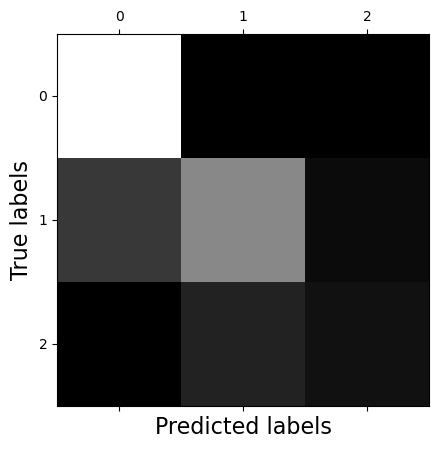

In [658]:
# calculate confusion matrix 
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_train, pred);

# print confusion matrix
print('Confusion matrix: ')
print(confmat)

# plot confusion matrix 
plt.matshow(confmat, cmap = 'gray')
plt.xlabel('Predicted labels', fontsize = 16)
plt.ylabel('True labels', fontsize = 16)

**Intepret the performance results:**
this result shows a relatively low average recall and a lower confusion matrix this can be due to class imbalances.


**Task 2.4 

Propose an amendment of your support vector classifier to address the problem that you identified in **Task 2.3**. Then perform these steps:
* tune the amended classifier
* print out best cross-validated accuracy
* calculate the recalls for each class
* calculate average recall

Was the problem resolved? Comment on the result.

*Note 1: the results will depend on the random train test split, so the answer might be different for different runs*

*Note 2: This is an open-ended question, you should not e-mail to ask what you can propose*

Confusion Matrix
[[44  1  0]
 [ 3 33  0]
 [ 0  8  1]]
Best cross-validated accuracy: 0.87
Recalls:  [0.98 0.92 0.11]
Average recall:  0.67


Text(0.5, 1.0, 'Decision Boundary for the improved model')

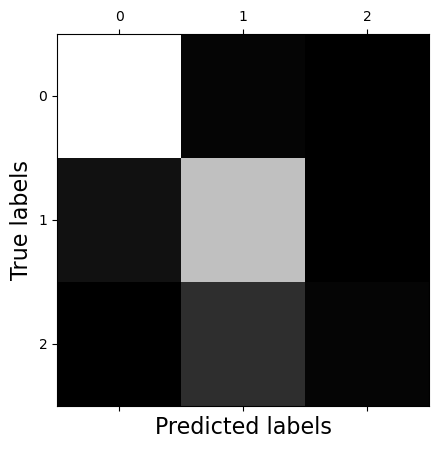

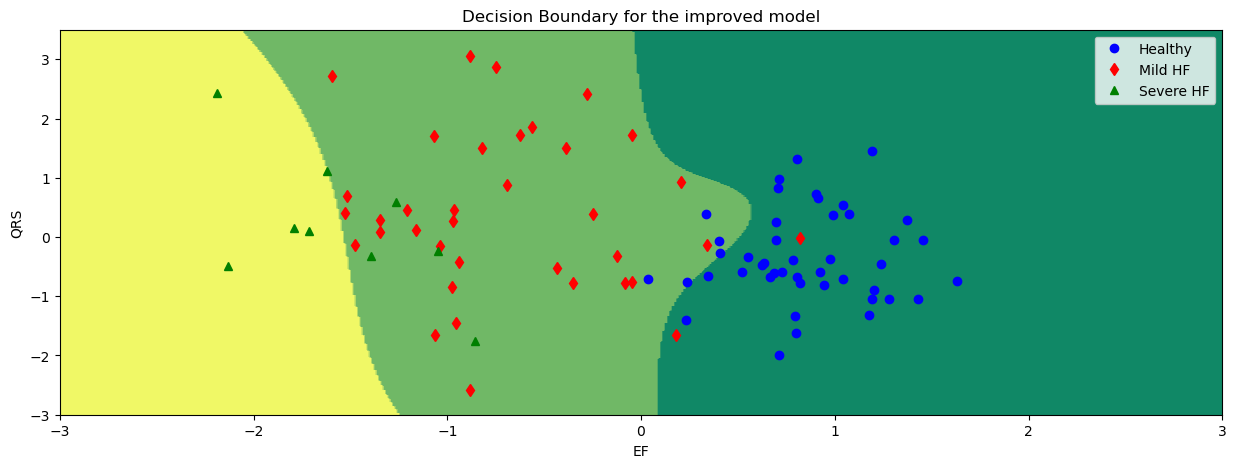

In [659]:
# Create and train a new improved model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
# create model
model2 = SVC(kernel = 'linear')

# create parameters
parameters = {'C': np.logspace(-3,3,13)}

# create grid search
gridsearch = GridSearchCV(model2, parameters, cv = 5)
gridsearch.fit(X_train,y_train)

# save best model
modelBest = gridsearch.best_estimator_
modelBestaccuracy = gridsearch.best_score_
score_l = cross_val_score(model2, X_train, y_train)

# predict labels using cross-validation
prediction = cross_val_predict(model2,X_train,y_train)
recalls2 = recall_score(y_train, prediction, average=None)

# find, print and plot the confusion matrix 
cm = confusion_matrix(y_train, prediction)
print('Confusion Matrix')
print(cm)
plt.matshow(cm, cmap = 'gray')
plt.xlabel('Predicted labels', fontsize = 16)
plt.ylabel('True labels', fontsize = 16)

# calculate average recall over all classes
averagerecall2 = recall_score(y_train, prediction, average = 'macro')

print('Best cross-validated accuracy:', round(score_l.mean(),2)) 

print('Recalls: ', np.around(recalls2,2))

print('Average recall: ', np.around(averagerecall2,2))

# Plot the classifier 
plt.figure(figsize=(15, 5))
plotDecisionBoundary(grid_search.best_estimator_, X_train,y_train) 
plt.title('Decision Boundary for the improved model')


**Explain how you improved the classifier and how the performance was improved:**

switching to a Gaussian SVC has improved the cross-validated accuracy and with improvements to the average recalls as well as the improved confusion matrix which has improved the classifier overall. A Linear kernel allows for the implicit use on non-linear data using linear algorthms.

__Task 2.5 

Select your prefered of the two classifiers that you implemented in 2.3 and/or 2.4.
* Evaluate your selected classifier **on the test set**. Include accuracy, recalls for each class and average recall. Print the results. 
* Plot the decision boundary and the test data
* Discuss the performance of your final model. Did the model generalise well to test data? Can you reason why?

/Users/johnnytang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy:  0.9
Recalls:  [1.   0.92 1.  ]
Average recall:  0.97


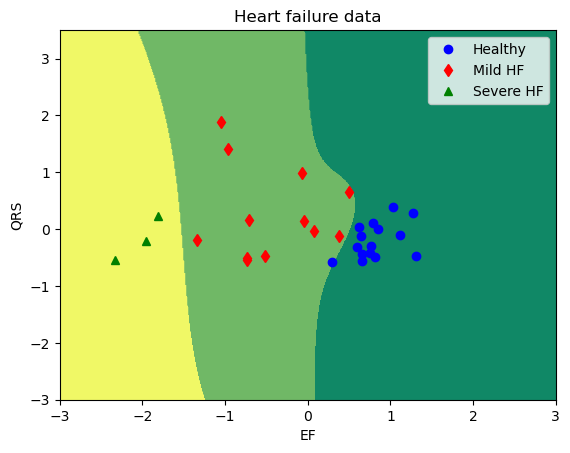

In [660]:
# using SVC with linear kernel
from sklearn.metrics import accuracy_score

# train and fit the selected classifier on the test data
selectedclassifier = model2
selectedclassifier.fit(X_test, y_test)

#evaluate selected classifier
y_pred_test = selectedclassifier.predict(X_test)

# calculate accuracy
selectedclassifierscore = cross_val_score(model2, X_test, y_test, cv=5)

# calculate recalls for the test set
recalls_test = recall_score(y_test, y_pred_test, average = None)

# calculate average recalls for the test set
average_recall_test = recall_score(y_test, y_pred_test, average = 'macro')

# accuracy
print('Accuracy: ', round(selectedclassifierscore.mean(),2))
#selectedclassifierscore.mean()
#accuracy_test

# recalls for all classes

print('Recalls: ', np.around(recalls_test,2))

# average recall over all classes

print('Average recall: ', np.around(average_recall_test,2))

# plot decision boundary
plotDecisionBoundary(grid_search.best_estimator_, X_test,y_test)